### Define Metric functions

In [1]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def SSD(y, y_pred):
    return np.sum(np.square(y - y_pred), axis=1)  # axis 1 is the signal dimension


def MAD(y, y_pred):
    return np.max(np.abs(y - y_pred), axis=1) # axis 1 is the signal dimension


def PRD(y, y_pred):
    N = np.sum(np.square(y_pred - y), axis=1)
    D = np.sum(np.square(y_pred - np.mean(y)), axis=1)

    PRD = np.sqrt(N/D) * 100

    return PRD


def COS_SIM(y, y_pred):
    cos_sim = []

    y = np.squeeze(y, axis=-1)
    y_pred = np.squeeze(y_pred, axis=-1)

    for idx in range(len(y)):
        kl_temp = cosine_similarity(y[idx].reshape(1, -1), y_pred[idx].reshape(1, -1))
        cos_sim.append(kl_temp)

    cos_sim = np.array(cos_sim)
    return cos_sim

### Visualization functions

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from prettytable import PrettyTable
from mpl_toolkits.mplot3d import Axes3D

def generate_violinplots(np_data, description, ylabel, log):
    # Process the results and store in Panda objects

    col = description
    loss_val_np = np.rot90(np_data)
    pd_df = pd.DataFrame.from_records(loss_val_np, columns=col)

    # Set up the matplotlib figure

    f, ax = plt.subplots()

    sns.set(style="whitegrid")

    ax = sns.violinplot(data=pd_df, palette="Set3", bw=.2, cut=1, linewidth=1)

    if log:
        ax.set_yscale("log")

    ax.set(xlabel='Models/Methods', ylabel=ylabel)
    ax = sns.despine(left=True, bottom=True)

    plt.show()

    #plt.savefig(store_folder + 'violinplot_fco' + info + description + '.png')


def generate_barplot(np_data, description, ylabel, log):
    # Process the results and store in Panda objects
    col = description
    loss_val_np = np.rot90(np_data)
    pd_df = pd.DataFrame.from_records(loss_val_np, columns=col)

    # Set up the matplotlib figure

    f, ax = plt.subplots()

    sns.set(style="whitegrid")

    ax = sns.barplot(data=pd_df)

    if log:
        ax.set_yscale("log")

    ax.set(xlabel='Models/Methods', ylabel=ylabel)
    ax = sns.despine(left=True, bottom=True)

    plt.show()

    #plt.savefig(store_folder + 'violinplot_fco' + info + description + '.png')


def generate_boxplot(np_data, description, ylabel, log):
    # Process the results and store in Panda objects
    col = description
    loss_val_np = np.rot90(np_data)
    pd_df = pd.DataFrame.from_records(loss_val_np, columns=col)

    # Set up the matplotlib figure

    f, ax = plt.subplots()

    sns.set(style="whitegrid")

    ax = sns.boxplot(data=pd_df)

    if log:
        ax.set_yscale("log")

    ax.set(xlabel='Models/Methods', ylabel=ylabel)
    ax = sns.despine(left=True, bottom=True)

    plt.show()

    #plt.savefig(store_folder + 'violinplot_fco' + info + description + '.png')


def generate_hboxplot(np_data, description, ylabel, log, set_x_axis_size=None):
    # Process the results and store in Panda objects
    col = description
    loss_val_np = np.rot90(np_data)

    pd_df = pd.DataFrame.from_records(loss_val_np, columns=col)

    # Set up the matplotlib figure
    sns.set(style="whitegrid")

    f, ax = plt.subplots(figsize=(15, 6))

    ax = sns.boxplot(data=pd_df, orient="h", width=0.4)

    if log:
        ax.set_xscale("log")

    if set_x_axis_size != None:
        ax.set_xlim(set_x_axis_size)

    ax.set(ylabel='Models/Methods', xlabel=ylabel)
    ax = sns.despine(left=True, bottom=True)

    plt.show()

    #plt.savefig(store_folder + 'violinplot_fco' + info + description + '.png')


def ecg_view(ecg, ecg_blw, ecg_dl, ecg_f, signal_name=None, beat_no=None):

    fig, ax = plt.subplots(figsize=(16, 9))
    plt.plot(ecg_blw, 'k', label='ECG + BW')
    plt.plot(ecg, 'g', label='ECG orig')
    plt.plot(ecg_dl, 'b', label='ECG DL Filtered')
    plt.plot(ecg_f, 'r', label='ECG IIR Filtered')
    plt.grid(True)

    plt.ylabel('au')
    plt.xlabel('samples')

    leg = ax.legend()

    if signal_name != None and beat_no != None:
        plt.title('Signal ' + str(signal_name) + 'beat ' + str(beat_no))
    else:
        plt.title('ECG signal for comparison')

    plt.show()


def ecg_view_diff(ecg, ecg_blw, ecg_dl, ecg_f, signal_name=None, beat_no=None):

    fig, ax = plt.subplots(figsize=(16, 9))
    plt.plot(ecg, 'g', label='ECG orig')
    plt.plot(ecg_dl, 'b', label='ECG DL Filtered')
    plt.plot(ecg_f, 'r', label='ECG IIR Filtered')
    plt.plot(ecg - ecg_dl, color='#0099ff', lw=3, label='Difference ECG - DL Filter')
    plt.plot(ecg - ecg_f, color='#cb828d', lw=3, label='Difference ECG - IIR Filter')
    plt.grid(True)

    plt.ylabel('Amplitude (au)')
    plt.xlabel('samples')

    leg = ax.legend()

    if signal_name != None and beat_no != None:
        plt.title('Signal ' + str(signal_name) + 'beat ' + str(beat_no))
    else:
        plt.title('ECG signal for comparison')

    plt.show()


def generate_table(metrics, metric_values, Exp_names):
    # Print tabular results in the console, in a pretty way
    tb = PrettyTable()
    ind = 0

    for exp_name in Exp_names:

        tb.field_names = ['Method/Model'] + metrics

        tb_row = []
        tb_row.append(exp_name)

        for metric in metric_values:   # metric_values[metric][model][beat]
            m_mean = np.mean(metric[ind])
            m_std = np.std(metric[ind])
            tb_row.append('{:.4f}'.format(m_mean) + ' (' + '{:.4f}'.format(m_std / np.sqrt(len(metric[ind]))) + ')')

        tb.add_row(tb_row)
        ind += 1

    print(tb)


def generate_table_time(column_names, all_values, Exp_names, gpu=True):
    # Print tabular results in the console, in a pretty way

    # The FIR and IIR are the last on all_values
    # We need circular shift them to the right
    all_values[0] = all_values[0][-2::] + all_values[0][0:-2]
    all_values[1] = all_values[1][-2::] + all_values[1][0:-2]

    tb = PrettyTable()
    ind = 0

    if gpu:
        device = 'GPU'
    else:
        device = 'CPU'

    for exp_name in Exp_names:
        tb.field_names = ['Method/Model'] + [column_names[0] + '(' + device + ') h:m:s:ms'] + [
            column_names[1] + '(' + device + ') h:m:s:ms']

        tb_row = []
        tb_row.append(exp_name)
        tb_row.append(all_values[0][ind])
        tb_row.append(all_values[1][ind])

        tb.add_row(tb_row)

        ind += 1

    print(tb)

    if gpu:
        print('* For FIR and IIR Filters is CPU since scipy filters are CPU based implementations')

### Load Experiments

In [3]:
import _pickle as pickle
from datetime import datetime
import numpy as np

dl_experiments = ['DRNN',
                  'FCN-DAE',
                  'Vanilla L',
                  'Vanilla NL',
                  'Multibranch LANL',
                  'Multibranch LANLD'
                  ]

# Load timing
with open('BA-DeepFilter_Mixed/timing_nv1.pkl', 'rb') as input:
    timing_nv1 = pickle.load(input)
    [train_time_list_nv1, test_time_list_nv1] = timing_nv1

with open('BA-DeepFilter_Mixed/timing_nv2.pkl', 'rb') as input:
    timing_nv2 = pickle.load(input)
    [train_time_list_nv2, test_time_list_nv2] = timing_nv2

train_time_list = []
test_time_list = []

for i in range(len(train_time_list_nv1)):
    train_time_list.append(train_time_list_nv1[i] + train_time_list_nv2[i])

for i in range(len(test_time_list_nv1)):
    test_time_list.append(test_time_list_nv1[i] + test_time_list_nv2[i])

timing = [train_time_list, test_time_list]

# Load Results DRNN
with open('BA-DeepFilter_Mixed/test_results_' + dl_experiments[0] + '_nv1.pkl', 'rb') as input:
    test_DRNN_nv1 = pickle.load(input)
with open('BA-DeepFilter_Mixed/test_results_' + dl_experiments[0] + '_nv2.pkl', 'rb') as input:
    test_DRNN_nv2 = pickle.load(input)

test_DRNN = [np.concatenate((test_DRNN_nv1[0], test_DRNN_nv2[0])),
             np.concatenate((test_DRNN_nv1[1], test_DRNN_nv2[1])),
             np.concatenate((test_DRNN_nv1[2], test_DRNN_nv2[2]))]

# Load Results FCN_DAE
with open('BA-DeepFilter_Mixed/test_results_' + dl_experiments[1] + '_nv1.pkl', 'rb') as input:
    test_FCN_DAE_nv1 = pickle.load(input)
with open('BA-DeepFilter_Mixed/test_results_' + dl_experiments[1] + '_nv2.pkl', 'rb') as input:
    test_FCN_DAE_nv2 = pickle.load(input)

test_FCN_DAE = [np.concatenate((test_FCN_DAE_nv1[0], test_FCN_DAE_nv2[0])),
                np.concatenate((test_FCN_DAE_nv1[1], test_FCN_DAE_nv2[1])),
                np.concatenate((test_FCN_DAE_nv1[2], test_FCN_DAE_nv2[2]))]

# Load Results Vanilla L
with open('BA-DeepFilter_Mixed/test_results_' + dl_experiments[2] + '_nv1.pkl', 'rb') as input:
    test_Vanilla_L_nv1 = pickle.load(input)
with open('BA-DeepFilter_Mixed/test_results_' + dl_experiments[2] + '_nv2.pkl', 'rb') as input:
    test_Vanilla_L_nv2 = pickle.load(input)

test_Vanilla_L = [np.concatenate((test_Vanilla_L_nv1[0], test_Vanilla_L_nv2[0])),
                  np.concatenate((test_Vanilla_L_nv1[1], test_Vanilla_L_nv2[1])),
                  np.concatenate((test_Vanilla_L_nv1[2], test_Vanilla_L_nv2[2]))]

# Load Results Exp Vanilla NL
with open('BA-DeepFilter_Mixed/test_results_' + dl_experiments[3] + '_nv1.pkl', 'rb') as input:
    test_Vanilla_NL_nv1 = pickle.load(input)
with open('BA-DeepFilter_Mixed/test_results_' + dl_experiments[3] + '_nv2.pkl', 'rb') as input:
    test_Vanilla_NL_nv2 = pickle.load(input)

test_Vanilla_NL = [np.concatenate((test_Vanilla_NL_nv1[0], test_Vanilla_NL_nv2[0])),
                   np.concatenate((test_Vanilla_NL_nv1[1], test_Vanilla_NL_nv2[1])),
                   np.concatenate((test_Vanilla_NL_nv1[2], test_Vanilla_NL_nv2[2]))]

# Load Results Multibranch LANL
with open('BA-DeepFilter_Mixed/test_results_' + dl_experiments[4] + '_nv1.pkl', 'rb') as input:
    test_Multibranch_LANL_nv1 = pickle.load(input)
with open('BA-DeepFilter_Mixed/test_results_' + dl_experiments[4] + '_nv2.pkl', 'rb') as input:
    test_Multibranch_LANL_nv2 = pickle.load(input)

test_Multibranch_LANL = [np.concatenate((test_Multibranch_LANL_nv1[0], test_Multibranch_LANL_nv2[0])),
                         np.concatenate((test_Multibranch_LANL_nv1[1], test_Multibranch_LANL_nv2[1])),
                         np.concatenate((test_Multibranch_LANL_nv1[2], test_Multibranch_LANL_nv2[2]))]

# Load Results Multibranch LANLD
with open('BA-DeepFilter_Mixed/test_results_' + dl_experiments[5] + '_nv1.pkl', 'rb') as input:
    test_Multibranch_LANLD_nv1 = pickle.load(input)
with open('BA-DeepFilter_Mixed/test_results_' + dl_experiments[5] + '_nv2.pkl', 'rb') as input:
    test_Multibranch_LANLD_nv2 = pickle.load(input)

test_Multibranch_LANLD = [np.concatenate((test_Multibranch_LANLD_nv1[0], test_Multibranch_LANLD_nv2[0])),
                          np.concatenate((test_Multibranch_LANLD_nv1[1], test_Multibranch_LANLD_nv2[1])),
                          np.concatenate((test_Multibranch_LANLD_nv1[2], test_Multibranch_LANLD_nv2[2]))]

# Load Result FIR Filter
with open('BA-DeepFilter_Mixed/test_results_FIR_nv1.pkl', 'rb') as input:
    test_FIR_nv1 = pickle.load(input)
with open('BA-DeepFilter_Mixed/test_results_FIR_nv2.pkl', 'rb') as input:
    test_FIR_nv2 = pickle.load(input)

test_FIR = [np.concatenate((test_FIR_nv1[0], test_FIR_nv2[0])),
            np.concatenate((test_FIR_nv1[1], test_FIR_nv2[1])),
            np.concatenate((test_FIR_nv1[2], test_FIR_nv2[2]))]

# Load Result IIR Filter
with open('BA-DeepFilter_Mixed/test_results_IIR_nv1.pkl', 'rb') as input:
    test_IIR_nv1 = pickle.load(input)
with open('BA-DeepFilter_Mixed/test_results_IIR_nv2.pkl', 'rb') as input:
    test_IIR_nv2 = pickle.load(input)

test_IIR = [np.concatenate((test_IIR_nv1[0], test_IIR_nv2[0])),
            np.concatenate((test_IIR_nv1[1], test_IIR_nv2[1])),
            np.concatenate((test_IIR_nv1[2], test_IIR_nv2[2]))]

### Calculate Metrics

In [4]:
print('Calculating metrics ...')

# DL Metrics

# Exp FCN-DAE

[X_test, y_test, y_pred] = test_DRNN

SSD_values_DL_DRNN = SSD(y_test, y_pred)

MAD_values_DL_DRNN = MAD(y_test, y_pred)

PRD_values_DL_DRNN = PRD(y_test, y_pred)

COS_SIM_values_DL_DRNN = COS_SIM(y_test, y_pred)


# Exp FCN-DAE

[X_test, y_test, y_pred] = test_FCN_DAE

SSD_values_DL_FCN_DAE = SSD(y_test, y_pred)

MAD_values_DL_FCN_DAE = MAD(y_test, y_pred)

PRD_values_DL_FCN_DAE = PRD(y_test, y_pred)

COS_SIM_values_DL_FCN_DAE = COS_SIM(y_test, y_pred)


# Vanilla L

[X_test, y_test, y_pred] = test_Vanilla_L

SSD_values_DL_exp_1 = SSD(y_test, y_pred)

MAD_values_DL_exp_1 = MAD(y_test, y_pred)

PRD_values_DL_exp_1 = PRD(y_test, y_pred)

COS_SIM_values_DL_exp_1 = COS_SIM(y_test, y_pred)


# Vanilla_NL

[X_test, y_test, y_pred] = test_Vanilla_NL

SSD_values_DL_exp_2 = SSD(y_test, y_pred)

MAD_values_DL_exp_2 = MAD(y_test, y_pred)

PRD_values_DL_exp_2 = PRD(y_test, y_pred)

COS_SIM_values_DL_exp_2 = COS_SIM(y_test, y_pred)


# Multibranch_LANL

[X_test, y_test, y_pred] = test_Multibranch_LANL

SSD_values_DL_exp_3 = SSD(y_test, y_pred)

MAD_values_DL_exp_3 = MAD(y_test, y_pred)

PRD_values_DL_exp_3 = PRD(y_test, y_pred)

COS_SIM_values_DL_exp_3 = COS_SIM(y_test, y_pred)


# Multibranch_LANLD

[X_test, y_test, y_pred] = test_Multibranch_LANLD

SSD_values_DL_exp_4 = SSD(y_test, y_pred)

MAD_values_DL_exp_4 = MAD(y_test, y_pred)

PRD_values_DL_exp_4 = PRD(y_test, y_pred)

COS_SIM_values_DL_exp_4 = COS_SIM(y_test, y_pred)


# Digital Filtering

# FIR Filtering Metrics
[X_test, y_test, y_filter] = test_FIR

SSD_values_FIR = SSD(y_test, y_filter)

MAD_values_FIR = MAD(y_test, y_filter)

PRD_values_FIR = PRD(y_test, y_filter)

COS_SIM_values_FIR = COS_SIM(y_test, y_filter)


# IIR Filtering Metrics (Best)
[X_test, y_test, y_filter] = test_IIR

SSD_values_IIR = SSD(y_test, y_filter)

MAD_values_IIR = MAD(y_test, y_filter)

PRD_values_IIR = PRD(y_test, y_filter)

COS_SIM_values_IIR = COS_SIM(y_test, y_filter)

Calculating metrics ...


### Results Visualization

In [5]:
SSD_all = [SSD_values_FIR,
               SSD_values_IIR,
               SSD_values_DL_DRNN,
               SSD_values_DL_FCN_DAE,
               #SSD_values_DL_exp_1,
               #SSD_values_DL_exp_2,
               #SSD_values_DL_exp_3,
               SSD_values_DL_exp_4,
               ]

MAD_all = [MAD_values_FIR,
               MAD_values_IIR,
               MAD_values_DL_DRNN,
               MAD_values_DL_FCN_DAE,
               #MAD_values_DL_exp_1,
               #MAD_values_DL_exp_2,
               #MAD_values_DL_exp_3,
               MAD_values_DL_exp_4,
               ]

PRD_all = [PRD_values_FIR,
               PRD_values_IIR,
               PRD_values_DL_DRNN,
               PRD_values_DL_FCN_DAE,
               #PRD_values_DL_exp_1,
               #PRD_values_DL_exp_2,
               #PRD_values_DL_exp_3,
               PRD_values_DL_exp_4,
               ]

COS_SIM_all = [COS_SIM_values_FIR,
                   COS_SIM_values_IIR,
                   COS_SIM_values_DL_DRNN,
                   COS_SIM_values_DL_FCN_DAE,
                   #COS_SIM_values_DL_exp_1,
                   #COS_SIM_values_DL_exp_2,
                   #COS_SIM_values_DL_exp_3,
                   COS_SIM_values_DL_exp_4,
                   ]


Exp_names = ['FIR Filter', 'IIR Filter'] + ['DRNN', 'FCN-DAE', 'DeepFilter']

metrics = ['SSD', 'COS_SIM']
metric_values = [SSD_all, COS_SIM_all]

# Metrics table
generate_table(metrics, metric_values, Exp_names)

# Timing table
timing_var = ['training', 'test']
generate_table_time(timing_var, timing, Exp_names, gpu=True)

+--------------+------------------+-----------------+
| Method/Model |       SSD        |     COS_SIM     |
+--------------+------------------+-----------------+
|  FIR Filter  | 58.1282 (0.5369) | 0.6329 (0.0013) |
|  IIR Filter  | 55.5419 (0.5315) | 0.6427 (0.0013) |
|     DRNN     | 9.8437 (0.0816)  | 0.8048 (0.0010) |
|   FCN-DAE    | 7.9662 (0.0698)  | 0.8483 (0.0009) |
|  DeepFilter  | 9.4329 (0.0887)  | 0.8347 (0.0009) |
+--------------+------------------+-----------------+
+--------------+------------------------+--------------------+
| Method/Model | training(GPU) h:m:s:ms | test(GPU) h:m:s:ms |
+--------------+------------------------+--------------------+
|  FIR Filter  |           0            |   1:32:37.752977   |
|  IIR Filter  |           0            |   0:00:21.324205   |
|     DRNN     |     2:30:08.723853     |   0:02:23.870367   |
|   FCN-DAE    |     0:17:11.706518     |   0:00:08.170311   |
|  DeepFilter  |     0:05:54.668165     |   0:00:02.037900   |
+---------

### Segmentation by noise amplitude

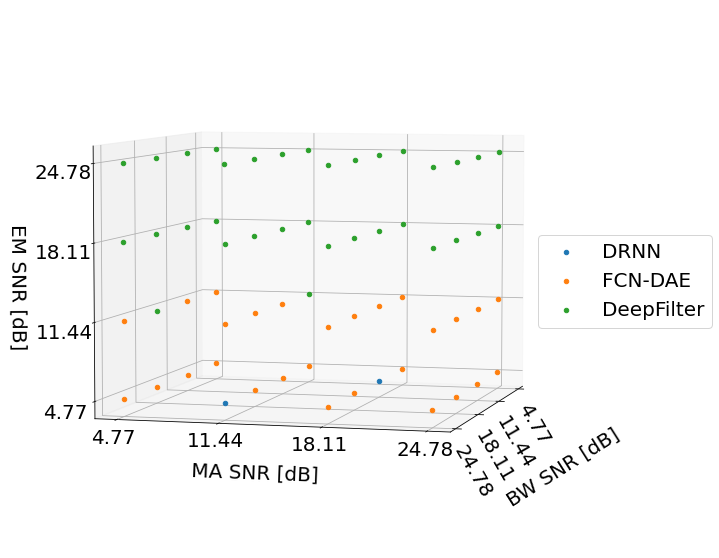

<Figure size 432x288 with 0 Axes>

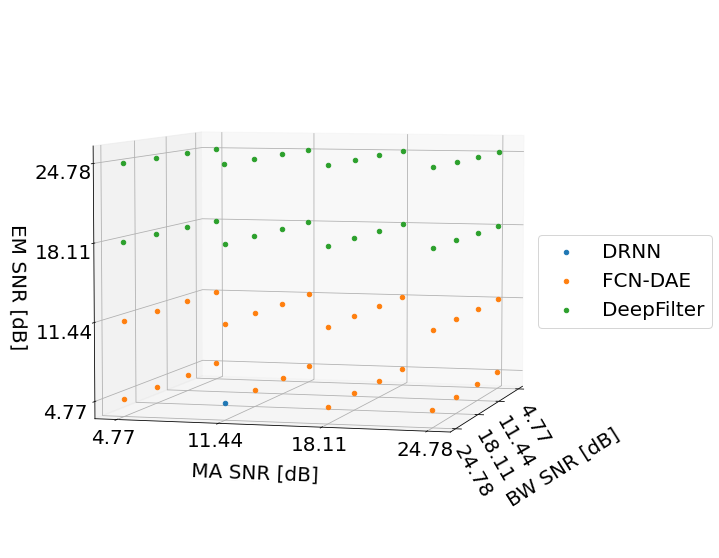

<Figure size 432x288 with 0 Axes>

In [15]:
import pandas as pd

SSD_columns = ['SSD_values_FIR', 'SSD_values_IIR', 'SSD_values_DL_DRNN', 'SSD_values_DL_FCN_DAE', 
               'SSD_values_DL_exp_4']
MAD_columns = ['MAD_values_FIR', 'MAD_values_IIR', 'MAD_values_DL_DRNN', 'MAD_values_DL_FCN_DAE', 
               'MAD_values_DL_exp_4']
PRD_columns = ['PRD_values_FIR', 'PRD_values_IIR', 'PRD_values_DL_DRNN', 'PRD_values_DL_FCN_DAE', 
               'PRD_values_DL_exp_4']
COS_SIM_columns = ['COS_SIM_values_FIR', 'COS_SIM_values_IIR', 'COS_SIM_values_DL_DRNN', 'COS_SIM_values_DL_FCN_DAE', 
                    'COS_SIM_values_DL_exp_4']

rnd_test_bw = np.load('BA-DeepFilter_Mixed/rnd_test_bw.npy')
rnd_test_em = np.load('BA-DeepFilter_Mixed/rnd_test_em.npy')
rnd_test_ma = np.load('BA-DeepFilter_Mixed/rnd_test_ma.npy')

rnd_test_bw = np.concatenate([rnd_test_bw, rnd_test_bw]) + 10 * np.log10(3)
rnd_test_em = np.concatenate([rnd_test_em, rnd_test_em]) + 10 * np.log10(3)
rnd_test_ma = np.concatenate([rnd_test_ma, rnd_test_ma]) + 10 * np.log10(3)


def to_lin(snr):
    return (10 ** (snr / 10))

def tot_snr(a, b, c):
    return(10 * np.log10(1/(1/a + 1/b + 1/c)))

rnd_test_tot = np.around(tot_snr(to_lin(rnd_test_bw), to_lin(rnd_test_em), to_lin(rnd_test_ma)))

SSD_plot = np.empty((len(Exp_names), len(rnd_test_bw)))


df = pd.DataFrame({'rnd_bw': rnd_test_bw, 'rnd_ma': rnd_test_ma, 'rnd_em': rnd_test_em, 'rnd_tot': rnd_test_tot})

for r in range(len(Exp_names)):
        df[SSD_columns[r]] = SSD_all[r]
        #df[MAD_columns[r]] = MAD_all[r]
        #df[PRD_columns[r]] = PRD_all[r]
        COS_SIM_all[r] = np.reshape(COS_SIM_all[r], np.shape(PRD_all[r]))
        df[COS_SIM_columns[r]] = COS_SIM_all[r]
#df = df.set_index(['rnd_bw', 'rnd_ma', 'rnd_em'])

df_1 = df.groupby(['rnd_bw', 'rnd_ma', 'rnd_em']).mean()
#print(df_1)

SSD_min = []
COS_SIM_max = []

for i in range(len(np.asarray(df_1.index.to_list())[:, 0])):
    min_SSD_i = []
    max_COS_SIM_i = []
    for n in SSD_columns:
        min_SSD_i.append(df_1[n].to_list()[i])
    for n in COS_SIM_columns:
        max_COS_SIM_i.append(df_1[n].to_list()[i])
    SSD_min.append(min_SSD_i.index(min(min_SSD_i)))
    COS_SIM_max.append(max_COS_SIM_i.index(max(max_COS_SIM_i)))

min_method = [SSD_min, COS_SIM_max]    
#print(len(SSD_min))
k = 0
for min_method_i in min_method:
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    plt.setp(ax, xticks=[4.77, 11.44, 18.11, 24.78], yticks=[4.77, 11.44, 18.11, 24.78], zticks=[4.77, 11.44, 18.11, 24.78])
    ax.view_init(elev=5., azim=15)
    ax.tick_params(axis='x', which='major', pad=5, labelrotation=-60)
    ax.tick_params(axis='y', which='major', pad=0, labelrotation=0)
    ax.tick_params(axis='z', which='major', pad=10, labelrotation=0)

    x = np.asarray(df_1.index.to_list())[:, 0]
    y = np.asarray(df_1.index.to_list())[:, 1]
    z = np.asarray(df_1.index.to_list())[:, 2]

    ax.set_xlabel('BW SNR [dB]', labelpad=40)
    ax.set_ylabel('MA SNR [dB]', labelpad=20)
    ax.set_zlabel('EM SNR [dB]', labelpad=25)
    

    labels = np.unique(min_method_i)
    for name in labels:
        i = np.where(min_method_i == name)
        x_i = np.take(x, i)
        y_i = np.take(y, i)
        z_i = np.take(z, i)
        
        img = ax.scatter(x_i, y_i, z_i, label=Exp_names[name], depthshade=False)
    ax.legend(bbox_to_anchor=(0.9, 0.6))
    plt.show()
    if k == 0:
        title = 'SSD'
    elif k == 1:
        title = 'COS_SIN'
    plt.savefig('Figures/SingleECG_3d_{}_Mixed.png'.format(title), bbox_inches='tight')
    k += 1

In [7]:
len(rnd_test_bw)

26632

In [8]:
x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.where(x == 7)
y

(array([6]),)

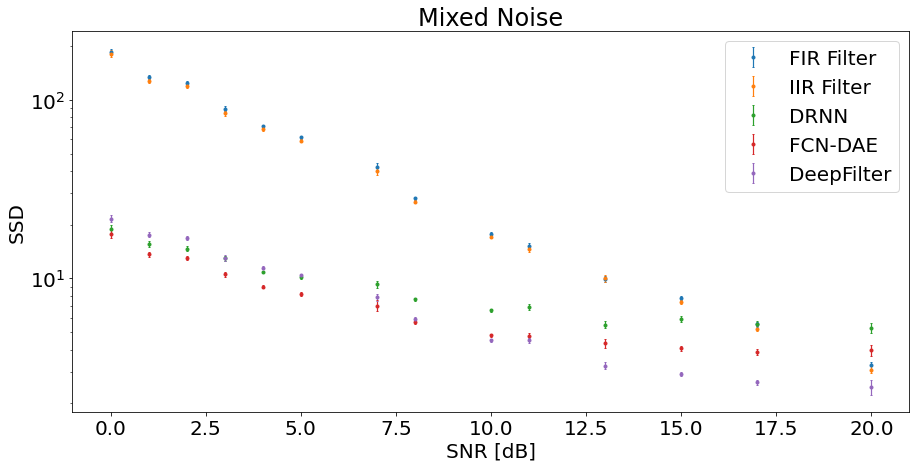

In [9]:
result_means = df.groupby('rnd_tot').mean()
result_stds = df.groupby('rnd_tot').std()
result_size = df.groupby('rnd_tot').size()

fig = plt.figure(figsize=(15, 7))
plt.rc('font', size=20)
for name in range(len(SSD_columns)):
    yerr = np.array(result_stds[SSD_columns[name]].tolist()) / np.array(np.sqrt(result_size).tolist())
    plt.errorbar(result_means.index, result_means[SSD_columns[name]].tolist(), 
                 yerr=yerr, label=Exp_names[name], fmt='.', elinewidth=1.2, capsize=1)
plt.legend()
plt.title('Mixed Noise')
plt.yscale('log')
plt.ylabel('SSD')
plt.xlabel('SNR [dB]')
#plt.ylim(1, 130)
plt.savefig('Figures/SingleECG_SSD_Mixed.png', bbox_inches='tight')

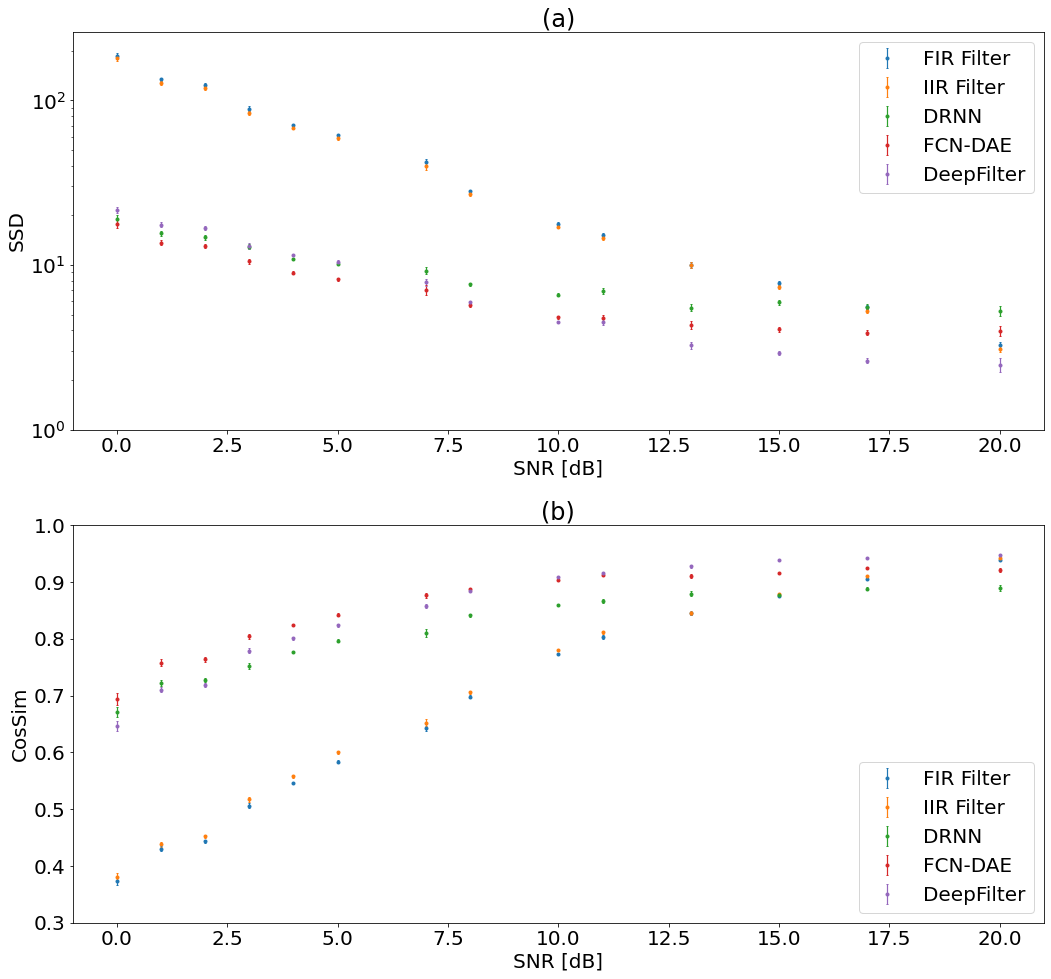

In [10]:
yerr_ssd = np.array(result_stds[SSD_columns[name]].tolist()) / np.array(np.sqrt(result_size).tolist())
yerr_cos_sim = np.array(result_stds[COS_SIM_columns[name]].tolist()) / np.array(np.sqrt(result_size).tolist())
plt.rc('font', size=20)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,14))
fig.subplots_adjust(hspace=0.7)
for name in range(len(SSD_columns)):
    yerr_ssd = np.array(result_stds[SSD_columns[name]].tolist()) / np.array(np.sqrt(result_size).tolist())
    yerr_cos_sim = np.array(result_stds[COS_SIM_columns[name]].tolist()) / np.array(np.sqrt(result_size).tolist())
    ax1.errorbar(result_means.index, result_means[SSD_columns[name]].tolist(), 
                         yerr=yerr_ssd, label=Exp_names[name], fmt='.', elinewidth=1.2, capsize=1)
    ax1.set_xlabel('SNR [dB]')
    ax1.set_ylabel('SSD')
    ax1.title.set_text('(a)')
    ax1.set_yscale('log')
    ax1.set_ylim(1, 260)
    ax1.legend()

    ax2.errorbar(result_means.index, result_means[COS_SIM_columns[name]].tolist(), 
                         yerr=yerr_cos_sim, label=Exp_names[name], fmt='.', elinewidth=1.2, capsize=1)
    ax2.set_xlabel('SNR [dB]')
    ax2.set_ylabel('CosSim')
    ax2.title.set_text('(b)')
    ax2.legend()
    ax2.set_ylim(0.3, 1)
    #ax2.set_yscale('log')
    plt.tight_layout()

plt.savefig('Figures/SingleECG_Metrics_Mixed.png', bbox_inches='tight')
plt.show()

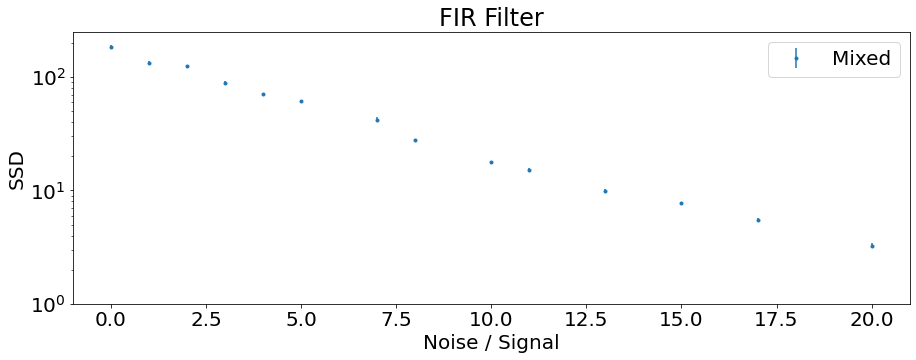

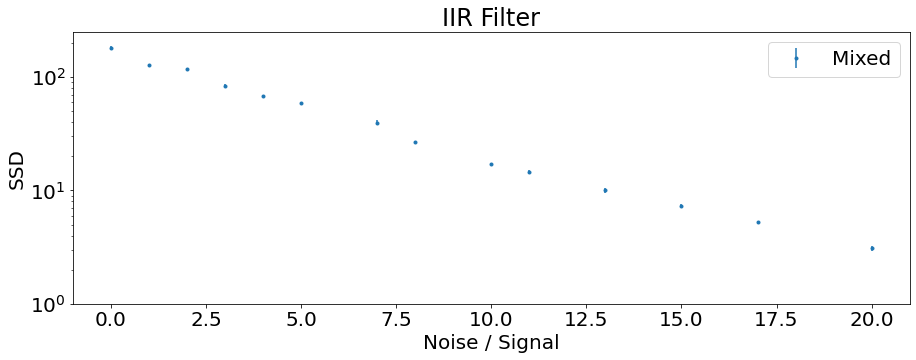

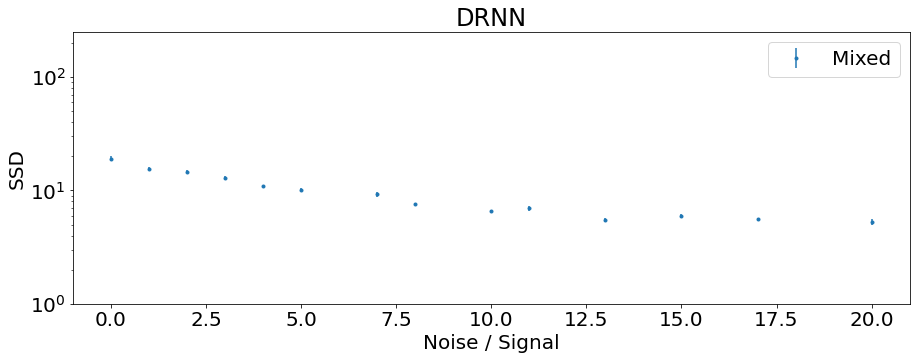

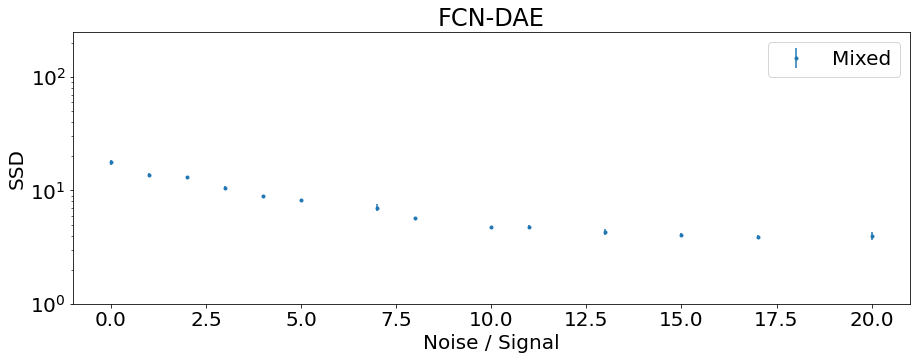

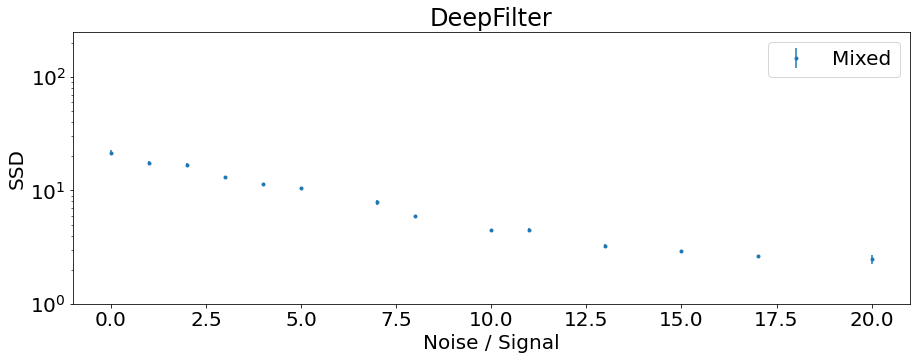

In [11]:
for name in range(len(SSD_columns)):
    fig = plt.figure(figsize=(15, 5))
    yerr = np.array(result_stds[SSD_columns[name]].tolist()) / np.array(np.sqrt(result_size).tolist())
    plt.errorbar(result_means.index, result_means[SSD_columns[name]].tolist(), yerr=yerr, label='Mixed', fmt='.')
    plt.legend()
    plt.title(Exp_names[name])
    plt.yscale('log')
    plt.ylabel('SSD')
    plt.xlabel('Noise / Signal')
    plt.ylim(1, 250)

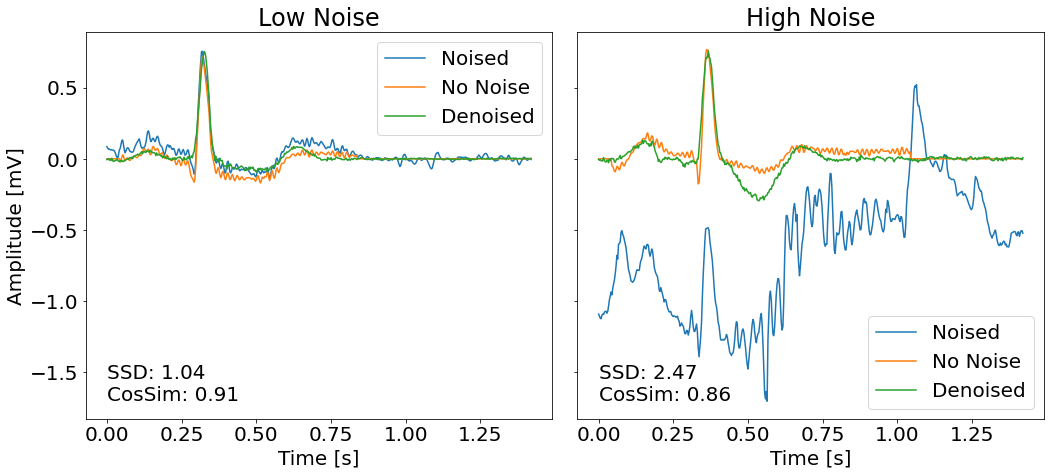

In [12]:
time = np.arange(0, 512) / 360
N_S = [0, 20]


low_noise = np.transpose(np.where(rnd_test_tot == 20))
high_noise = np.transpose(np.where(rnd_test_tot == 0))
low_noise_idx = low_noise[int((len(low_noise))/2)]
high_noise_idx = high_noise[int((len(high_noise))/2)+3]
[X_test, y_test, y_pred] = test_FCN_DAE

plt.rc('font', size=20)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7), sharey = 'all')
fig.subplots_adjust(hspace=0.7)

ax1.plot(time, np.reshape(X_test[low_noise_idx], len(time)), label='Noised')
ax1.plot(time, np.reshape(y_test[low_noise_idx], len(time)), label='No Noise')
ax1.plot(time, np.reshape(y_pred[low_noise_idx], len(time)), label='Denoised')
#ax1.set_xlim(0, 5)
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Amplitude [mV]')
ax1.legend()
ax1.text(0, -1.7, 'SSD: {:.2f}\nCosSim: {:.2f}'.format(float(SSD_all[3][low_noise_idx]), float(COS_SIM_all[3][low_noise_idx])))
ax1.title.set_text('Low Noise')

ax2.plot(time, np.reshape(X_test[high_noise_idx], len(time)), label='Noised')
ax2.plot(time, np.reshape(y_test[high_noise_idx], len(time)), label='No Noise')
ax2.plot(time, np.reshape(y_pred[high_noise_idx], len(time)), label='Denoised')
#ax1.set_xlim(0, 5)
ax2.set_xlabel('Time [s]')
#ax2.set_ylabel('Amplitude [mV]')
ax2.legend()
ax2.title.set_text('High Noise')
ax2.text(0, -1.7, 'SSD: {:.2f}\nCosSim: {:.2f}'.format(float(SSD_all[3][high_noise_idx]), float(COS_SIM_all[3][high_noise_idx])))
plt.tight_layout()

#plt.savefig('Figures/Noise_Range_{}.png'.format(noise_types[noise]), bbox_inches='tight')
plt.savefig('Figures/singleECG_mixed_denoised.png', bbox_inches='tight')

plt.show()

In [13]:
print(np.unique(rnd_test_tot))
a = np.around(rnd_test_tot)
print(np.unique(a))

[ 0.  1.  2.  3.  4.  5.  7.  8. 10. 11. 13. 15. 17. 20.]
[ 0.  1.  2.  3.  4.  5.  7.  8. 10. 11. 13. 15. 17. 20.]


In [14]:
rnd_test = np.load('rnd_test.npy')

rnd_test = np.concatenate([rnd_test, rnd_test])

segm = [0.2, 0.6, 1.0, 1.5, 2.0]  # real number of segmentations is len(segmentations) - 1
SSD_seg_all = []
MAD_seg_all = []
PRD_seg_all = []
COS_SIM_seg_all = []

for idx_exp in range(len(Exp_names)):
    SSD_seg = [None] * (len(segm) - 1)
    MAD_seg = [None] * (len(segm) - 1)
    PRD_seg = [None] * (len(segm) - 1)
    COS_SIM_seg = [None] * (len(segm) - 1)
    for idx_seg in range(len(segm) - 1):
        SSD_seg[idx_seg] = []
        MAD_seg[idx_seg] = []
        PRD_seg[idx_seg] = []
        COS_SIM_seg[idx_seg] = []
        for idx in range(len(rnd_test)):
            # Object under analysis (oua)
            # SSD
            oua = SSD_all[idx_exp][idx]
            if rnd_test[idx] > segm[idx_seg] and rnd_test[idx] < segm[idx_seg + 1]:
                SSD_seg[idx_seg].append(oua)

            # MAD
            oua = MAD_all[idx_exp][idx]
            if rnd_test[idx] > segm[idx_seg] and rnd_test[idx] < segm[idx_seg + 1]:
                MAD_seg[idx_seg].append(oua)

            # PRD
            oua = PRD_all[idx_exp][idx]
            if rnd_test[idx] > segm[idx_seg] and rnd_test[idx] < segm[idx_seg + 1]:
                PRD_seg[idx_seg].append(oua)

            # COS SIM
            oua = COS_SIM_all[idx_exp][idx]
            if rnd_test[idx] > segm[idx_seg] and rnd_test[idx] < segm[idx_seg + 1]:
                COS_SIM_seg[idx_seg].append(oua)

    # Processing the last index
    # SSD
    SSD_seg[-1] = []
    for idx in range(len(rnd_test)):
        # Object under analysis
        oua = SSD_all[idx_exp][idx]
        if rnd_test[idx] > segm[-2]:
            SSD_seg[-1].append(oua)

    SSD_seg_all.append(SSD_seg)  # [exp][seg][item]

    # MAD
    MAD_seg[-1] = []
    for idx in range(len(rnd_test)):
        # Object under analysis
        oua = MAD_all[idx_exp][idx]
        if rnd_test[idx] > segm[-2]:
            MAD_seg[-1].append(oua)

    MAD_seg_all.append(MAD_seg)  # [exp][seg][item]

    # PRD
    PRD_seg[-1] = []
    for idx in range(len(rnd_test)):
        # Object under analysis
        oua = PRD_all[idx_exp][idx]
        if rnd_test[idx] > segm[-2]:
            PRD_seg[-1].append(oua)

    PRD_seg_all.append(PRD_seg)  # [exp][seg][item]

    # COS SIM
    COS_SIM_seg[-1] = []
    for idx in range(len(rnd_test)):
        # Object under analysis
        oua = COS_SIM_all[idx_exp][idx]
        if rnd_test[idx] > segm[-2]:
            COS_SIM_seg[-1].append(oua)

    COS_SIM_seg_all.append(COS_SIM_seg)  # [exp][seg][item]

# Printing Tables
seg_table_column_name = []
for idx_seg in range(len(segm) - 1):
    column_name = str(segm[idx_seg]) + ' < noise < ' + str(segm[idx_seg + 1])
    seg_table_column_name.append(column_name)

# SSD Table
SSD_seg_all = np.array(SSD_seg_all)
SSD_seg_all = np.swapaxes(SSD_seg_all, 0, 1)

print('\n')
print('Printing Table for different noise values on the SSD metric')
generate_table(seg_table_column_name, SSD_seg_all, Exp_names)

# MAD Table
MAD_seg_all = np.array(MAD_seg_all)
MAD_seg_all = np.swapaxes(MAD_seg_all, 0, 1)

print('\n')
print('Printing Table for different noise values on the MAD metric')
generate_table(seg_table_column_name, MAD_seg_all, Exp_names)

# PRD Table
PRD_seg_all = np.array(PRD_seg_all)
PRD_seg_all = np.swapaxes(PRD_seg_all, 0, 1)

print('\n')
print('Printing Table for different noise values on the PRD metric')
generate_table(seg_table_column_name, PRD_seg_all, Exp_names)

# COS SIM Table
COS_SIM_seg_all = np.array(COS_SIM_seg_all)
COS_SIM_seg_all = np.swapaxes(COS_SIM_seg_all, 0, 1)

print('\n')
print('Printing Table for different noise values on the COS SIM metric')
generate_table(seg_table_column_name, COS_SIM_seg_all, Exp_names)

FileNotFoundError: [Errno 2] No such file or directory: 'rnd_test.npy'

### Plot Graphs

In [ ]:
# Metrics graphs
print('SSD Metric comparative graph')
generate_hboxplot(SSD_all, Exp_names, 'SSD (au)', log=False, set_x_axis_size=(0, 100.1))
print('MAD Metric comparative graph')
generate_hboxplot(MAD_all, Exp_names, 'MAD (au)', log=False, set_x_axis_size=(0, 3.01))
print('PRD Metric comparative graph')
generate_hboxplot(PRD_all, Exp_names, 'PRD (au)', log=False, set_x_axis_size=(0, 150.1))
print('Cosine Similarity Metric comparative graph')
generate_hboxplot(COS_SIM_all, Exp_names, 'Cosine Similarity (0-1)', log=False, set_x_axis_size=(0, 1))

### Visualize Signals

In [ ]:
signals_index = np.array([110, 210, 410, 810, 1610, 3210, 6410, 12810]) + 10

ecg_signals2plot = []
ecgbl_signals2plot = []
dl_signals2plot = []
fil_signals2plot = []

signal_amount = 10

[X_test, y_test, y_pred] = test_Multibranch_LANLD
for id in signals_index:
    ecgbl_signals2plot.append(X_test[id])
    ecg_signals2plot.append(y_test[id])
    dl_signals2plot.append(y_pred[id])

[X_test, y_test, y_filter] = test_IIR
for id in signals_index:
    fil_signals2plot.append(y_filter[id])

for i in range(len(signals_index)):
    ecg_view(ecg=ecg_signals2plot[i],
                ecg_blw=ecgbl_signals2plot[i],
                ecg_dl=dl_signals2plot[i],
                ecg_f=fil_signals2plot[i],
                signal_name=None,
                beat_no=None)

    ecg_view_diff(ecg=ecg_signals2plot[i],
                     ecg_blw=ecgbl_signals2plot[i],
                     ecg_dl=dl_signals2plot[i],
                     ecg_f=fil_signals2plot[i],
                     signal_name=None,
                     beat_no=None)